In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [46]:
data = []
labels = []
cur_path = os.getcwd() 
train_path = os.path.join(cur_path,'Train2')

classes = len(os.listdir(train_path))

for c in os.listdir(train_path): 
  path = os. path.join(train_path, c, 'augmented_data')
  images = os.listdir(path) 
  for a in images: 
    try: 
        image = Image.open(path + '\\' + a)
        image = image.resize((30,30)) 
        image = np.array(image) 
        data.append(image) 
        labels.append(c) 
    except: 
        print("Error loading image") 
data = np.array(data)
labels = np.array(labels)


c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\atencion_incorporacion_der
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\atencion_incorporacion_der_2
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\atencion_incorporacion_doble
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\atencion_incorporacion_izq
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\atencion_rotonda
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\atencion_semaforo
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\ceda
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\peligro
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\peligro_animal
Error loading image
c:\Users\JoseM\Documents\UNIVERSIDAD\SW-PID-Proyecto\cnn\Train2\pelig

In [39]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

print(data.shape, labels.shape)

(9090, 30, 30) (9090,)


In [40]:
# Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=classes)

print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
#y_t1 = to_categorical(y_t1, classes+1)
#y_t2 = to_categorical(y_t2, classes+1)


(7272, 30, 30) (1818, 30, 30) (7272,) (1818,)


In [41]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 1)))  # Adjust input shape
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))

# Compilation of the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))


Epoch 1/15
228/228 [==============================] - 12s 46ms/step - loss: 3.3613 - accuracy: 0.3001 - val_loss: 2.2214 - val_accuracy: 0.4378
Epoch 2/15
228/228 [==============================] - 11s 46ms/step - loss: 2.1572 - accuracy: 0.4417 - val_loss: 1.7017 - val_accuracy: 0.5226
Epoch 3/15
228/228 [==============================] - 10s 46ms/step - loss: 1.7953 - accuracy: 0.5084 - val_loss: 1.5270 - val_accuracy: 0.5770
Epoch 4/15
228/228 [==============================] - 11s 46ms/step - loss: 1.5880 - accuracy: 0.5457 - val_loss: 1.2635 - val_accuracy: 0.6282
Epoch 5/15
228/228 [==============================] - 10s 46ms/step - loss: 1.4205 - accuracy: 0.5738 - val_loss: 1.1339 - val_accuracy: 0.6529
Epoch 6/15
228/228 [==============================] - 11s 47ms/step - loss: 1.2849 - accuracy: 0.6165 - val_loss: 0.9938 - val_accuracy: 0.6997
Epoch 7/15
228/228 [==============================] - 11s 47ms/step - loss: 1.1761 - accuracy: 0.6346 - val_loss: 0.9245 - val_accuracy:

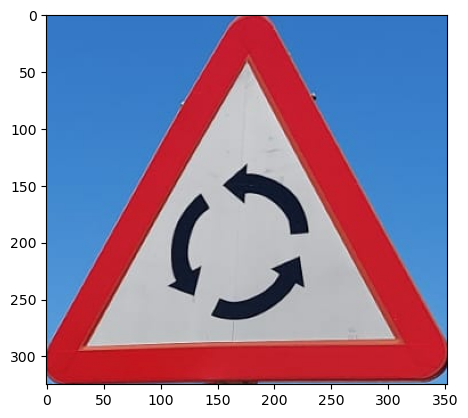

In [43]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../script/images2/rotonda1.jpg',cv.IMREAD_COLOR)

h_inf_1=170
h_sup_1=180
h_inf_2=0
h_sup_2=5

lower_red_1 = np.array([h_inf_1,50,50])
upper_red_1 = np.array([h_sup_1,255,255])
lower_red_2 = np.array([h_inf_2,50,50])
upper_red_2 = np.array([h_sup_2,255,255])

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
red_mask_1 = cv.inRange(hsv, lower_red_1, upper_red_1)
red_mask_2 = cv.inRange(hsv, lower_red_2, upper_red_2)

red_mask = red_mask_1+red_mask_2

img_rojo = cv.bitwise_and(img,img, mask= red_mask)

gray = cv.cvtColor(img_rojo, cv.COLOR_BGR2GRAY)
binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)[1]

forms = cv.erode(binary, np.ones((3,3),np.uint8), iterations = 1)

contours = cv.findContours(forms, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
biggest_contour = max(contours[0], key=cv.contourArea)

img_copy = img.copy()
x,y,w,h = cv.boundingRect(biggest_contour)
cv.drawContours(img_copy, biggest_contour, -1, (0,255,0), 3)
cv.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)

cropped = img[y:y+h, x:x+w]

plt.imshow(cv.cvtColor(cropped,cv.COLOR_BGR2RGB))

1/1 [==============================] - 0s 100ms/step
Predicted class: peligro_baden


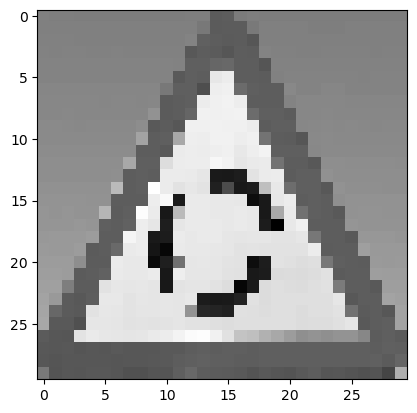

In [44]:
# Prepare the image
image = cv.resize(cropped, (30,30))
# Convert to grayscale
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = np.array(image)
image = image.reshape(1,30,30,1)

#show image
plt.imshow(image.reshape(30,30), cmap='gray')

# Make predictions
predictions = model.predict(image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

predicted_class_label = label_encoder.inverse_transform([predicted_class_index])

# Print the predicted class label
print("Predicted class:", predicted_class_label[0])